## 1. Data Preprocessing - Code

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 
# matplotlib inline
sns.set_theme(style='whitegrid')
 
dataset = pd.read_csv("50_Startups.csv")
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])

Dataset shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]

After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


## 2. Fit Model - Code

In [2]:
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 40
Test samples: 10
Intercept: 42467.52924854249
Number of coefficients: 6


## 3. Predict - Code

In [3]:
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


## 4. Visualization - Code

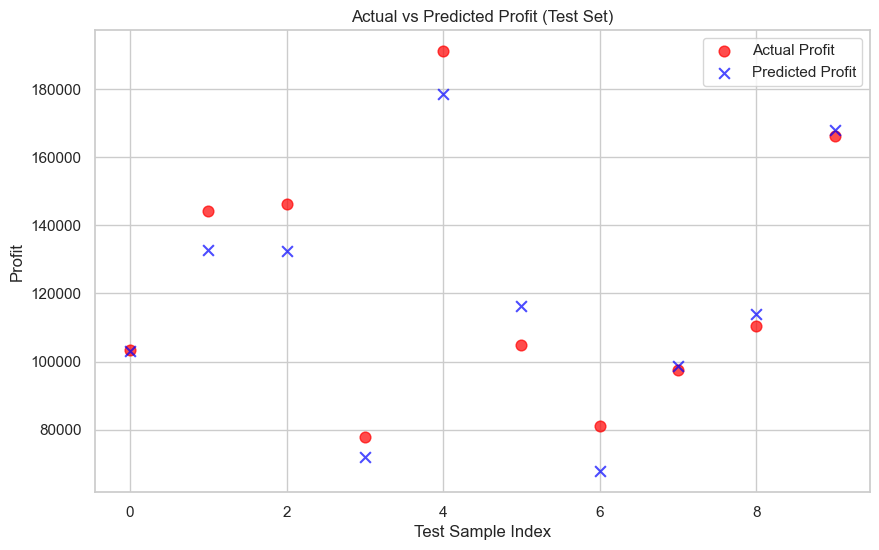

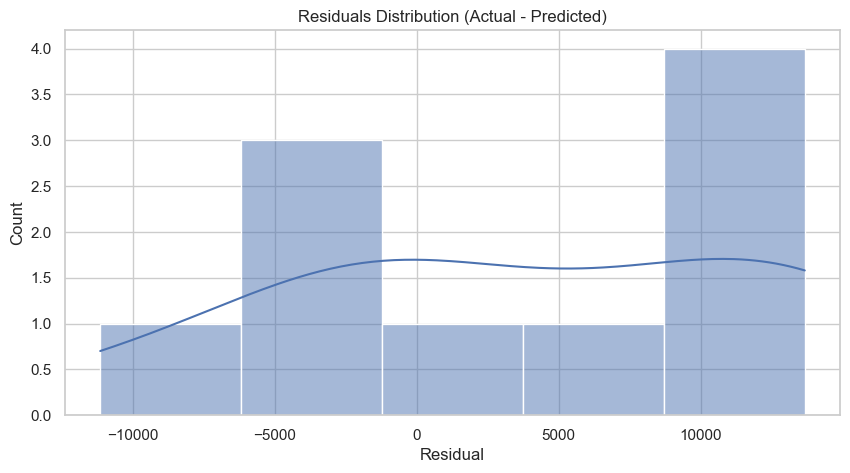

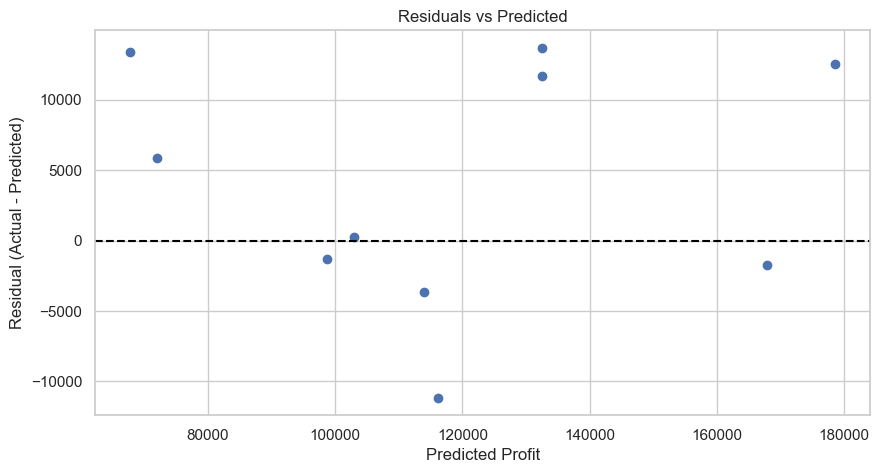

In [4]:
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [6]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347


In [7]:
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))


Sample startup predicted profit: 181566.92389385228


## Medical Insurance Cost Analysis

### Task 1 — Business Understanding

In [8]:
import pandas as pd

df = pd.read_csv("insurance.csv")

# Target variable
y = df['charges']

# Input variables
X = df.drop('charges', axis=1)

print("Target Variable:", y.name)
print("Input Variables:", X.columns)

Target Variable: charges
Input Variables: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


### How the Model Helps Control Costs:
#### The regression model identifies which factors increase costs the most (e.g., smoking, high BMI), enabling the company to adjust pricing, manage risk, and take preventive actions, not just predict future expenses.

### Task 2 — Data Inspection

#### Categorical columns (sex, smoker, region) are not directly usable
#### Regression models require numeric input
#### Numeric features have different scales


In [9]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


### Task 3 — Data Cleaning & Encoding

In [10]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

print(X_encoded.head())

   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


### Justification

#### Binary columns (sex, smoker) are converted to 0/1
#### Region is one-hot encoded to avoid false ranking
#### This preserves business meaning and avoids bias


### Task 4 — Feature Scaling & Comparability

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

### Explanation

#### Features like age, bmi, and charges have very different ranges
#### Scaling ensures coefficients represent fair influence
#### Necessary for interpretation and regularization

### Task 5 — The Hidden Trap (Multicollinearity)

Correlation Matrix:                        age       bmi  children  sex_male  smoker_yes  \
age               1.000000  0.109272  0.042469 -0.020856   -0.025019   
bmi               0.109272  1.000000  0.012759  0.046371    0.003750   
children          0.042469  0.012759  1.000000  0.017163    0.007673   
sex_male         -0.020856  0.046371  0.017163  1.000000    0.076185   
smoker_yes       -0.025019  0.003750  0.007673  0.076185    1.000000   
region_northwest -0.000407 -0.135996  0.024806 -0.011156   -0.036945   
region_southeast -0.011642  0.270025 -0.023066  0.017117    0.068498   
region_southwest  0.010016 -0.006205  0.021914 -0.004184   -0.036945   

                  region_northwest  region_southeast  region_southwest  
age                      -0.000407         -0.011642          0.010016  
bmi                      -0.135996          0.270025         -0.006205  
children                  0.024806         -0.023066          0.021914  
sex_male                 -0.011156     

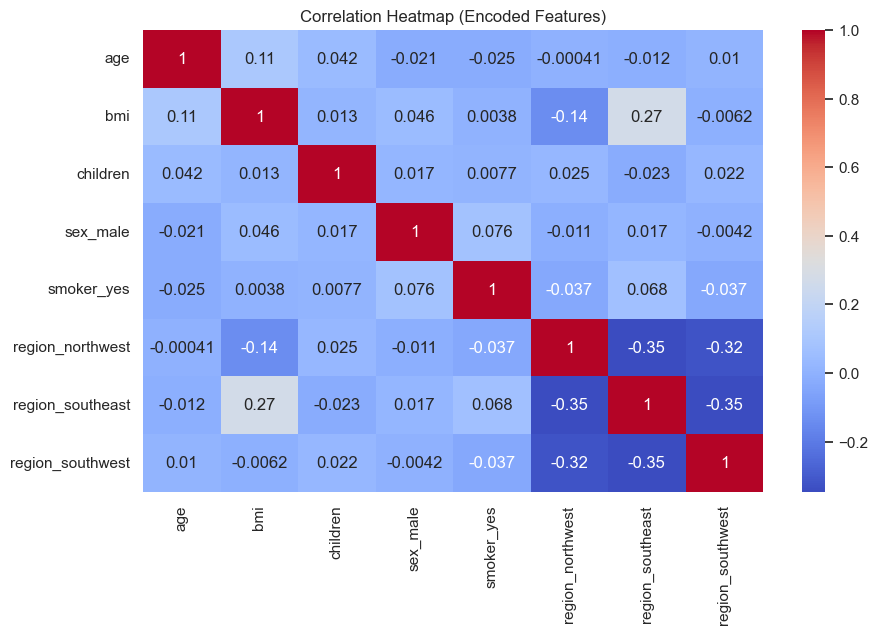

In [16]:
# Correlation Matrix

import pandas as pd

correlation_matrix = pd.DataFrame(X_scaled, columns=X_encoded.columns).corr()
print("Correlation Matrix:",correlation_matrix)

# HeatMap

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_encoded.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()


In [13]:
# Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif_data = pd.DataFrame()
vif_data["Feature"] = X_encoded.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_scaled, i)
    for i in range(X_scaled.shape[1])
]

print(vif_data)


            Feature       VIF
0               age  1.016822
1               bmi  1.106630
2          children  1.004011
3          sex_male  1.008900
4        smoker_yes  1.012074
5  region_northwest  1.518823
6  region_southeast  1.652230
7  region_southwest  1.529411


### Explanation

#### Multicollinearity causes unstable coefficients
#### It confuses which factor truly drives cost
#### Business decisions become unreliable
#### Solution: remove correlated features or use Ridge Regression


### Apply Multiple Linear Regression

In [30]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


LinearRegression()

### Interpretation

#### Lower MAE and RMSE indicate better prediction accuracy
#### R² score shows how much variance in charges is explained


In [33]:
coeff_df = pd.DataFrame(
    mlr_model.coef_,
    index=X_train.columns,
    columns=["Coefficient"]
).sort_values(by="Coefficient", ascending=False)

print(coeff_df)


                  Coefficient
smoker_yes        9544.251089
age               3609.149018
bmi               2054.885063
children           512.478869
sex_male            -9.295337
region_northwest  -158.959435
region_southeast  -292.759080
region_southwest  -347.270359


In [34]:
# Interpret Regression Coefficients

coeff_df = pd.DataFrame(
    mlr_model.coef_,
    index=X_train.columns,
    columns=["Coefficient"]
).sort_values(by="Coefficient", ascending=False)

print(coeff_df)

                  Coefficient
smoker_yes        9544.251089
age               3609.149018
bmi               2054.885063
children           512.478869
sex_male            -9.295337
region_northwest  -158.959435
region_southeast  -292.759080
region_southwest  -347.270359


### Visualization: Actual vs Predicted Charges

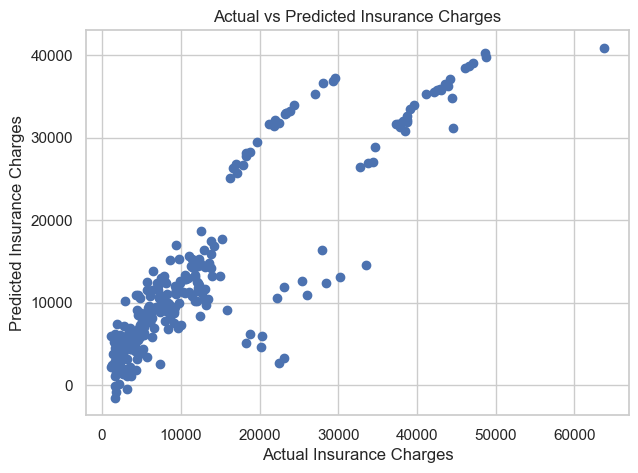

In [37]:
import matplotlib.pyplot as plt

y_pred = mlr_model.predict(X_test)
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()